<img src='https://data.cityofchicago.org/api/assets/73F1665C-0FE6-4183-8AD1-E91DB8EFAFA4?7CB02402-8E06-48B0-8C9A-3890182D58C7.png'>

## Package setup.

In [1]:
# # In case you have the wrong version of Pandas installed.
# !pip uninstall pandas -y # Remove an pre 1.5.3
# !pip uninstall numpy -y

# Install some needed packages
# !pip install -U pandasai --quiet
# !pip install -U plotly --quiet
# !pip install pyyaml --quiet
# !pip install seaborn --quiet

# # Show the package vers
# !pip show pandas
# !pip show pandasai

## Read the local crime csv

In [2]:
import pandas as pd
# ensure you've unzipped the data and changed this path as needed
crime = pd.read_csv('./data/chicago_iucr.csv')

import warnings
warnings.filterwarnings('ignore')


## Create a head Df to help the AI with col name descs. 

In [3]:
df_head = crime.head(3)

In [4]:
field_descriptions = {
    "id": "Unique identifier for the record.",
    "date": "The Date when the incident occurred. Stored as text.",
    "block": "Partially redacted address where the incident occurred, within the same block as the actual address.",
    "location_description": "Description of the location where the incident occurred.",
    "arrest": "Indicates whether an arrest was made.",
    "domestic": "Indicates whether the incident was domestic-related as per the Illinois Domestic Violence Act.",
    "beat": "Police beat where the incident occurred, part of the smallest police geographic area.",
    "district": "Police district where the incident occurred.",
    "ward": "City Council district (ward) where the incident occurred.",
    "community_area": "Indicates the community area where the incident occurred, with Chicago having 77 community areas.",
    "fbi_code": "Crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).",
    "latitude": "Latitude of the incident location, shifted for partial redaction but on the same block.",
    "longitude": "Longitude of the incident location, shifted for partial redaction but on the same block.",
    "crime": "The crime committed, aka the incident."
}


## Import all our Pandas AI stuff & set up our GPT Model (Azure, OpenAI or Local) Behavior

In [5]:
import os
import random
from pandasai import SmartDataframe
from pandasai.llm import AzureOpenAI
from pandasai.llm.local_llm import LocalLLM
from pandasai.llm import OpenAI
from pandasai import Agent
from pandasai.llm.openai import OpenAI
from pandasai.connectors import PandasConnector
from dotenv import load_dotenv
# Load environment variables from .env file
load_dotenv()

# Get my Openai Var Key
open_ai_key = os.getenv('OPENAI_API_KEY')

# Choose the model
select_model = 'OpenAI' #OpenAI, #Azure, #Local via LMStudio or similar.

if select_model == 'Azure':
    # Define the LLM model for Azure (if True)
    azure_api_key = os.getenv('AZURE_OPENAI_API_KEY')
    azure_api_ver = os.getenv('AZURE_API_VERSION')
    azure_api_endpt = os.getenv('AZURE_OPENAI_ENDPOINT')
    azure_oai_deployment = os.getenv('AZURE_OPENAI_DEPLOYMENT')
    llm = AzureOpenAI(
        api_token=azure_api_key,
        azure_endpoint=azure_api_endpt,
        api_version=azure_api_ver,
        deployment_name=azure_oai_deployment,
        temperature=0,
        seed=26,
    )
elif select_model == 'OpenAI':
    openai_api_key = os.getenv('OPENAI_API_KEY')
    llm = OpenAI(api_token=openai_api_key, 
                 temperature=0,
                 seed=35,
                )
    
elif select_model == 'Local':
    llm = LocalLLM(api_base="http://localhost:1234/v1",
                  temperature=0, 
                  seed=random.randint(1, 100),
                  )


# A description of the overall table
description = '''You are a data analysis agent. Your main goal is to help non-technical users to analyze data.\
                This dataset reflects reported incidents of crime (with the exception of murders where \
                data exists for each victim) that occurred in the City of Chicago from 2001 to present, \
                minus the most recent seven days. Data is extracted from the Chicago Police Department's \
                CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, \
                addresses are shown at the block level only and specific locations are not identified. '''

# Define my connector
agent = Agent(crime, config={'llm': llm,
                            'description': description,
                            'enable_cache': True,
                            'verbose': True,
                            'field_description': field_descriptions,
                            'save_charts': False,
                            'save_charts_path': './saved_plots',
                            'open_charts': True,
                            }
             )

## Simple Chat

2024-06-17 07:45:36 [INFO] Question:  Find the top crime committed, then plot a trend line by date.  
2024-06-17 07:45:36 [INFO] Running PandasAI with openai LLM...
2024-06-17 07:45:36 [INFO] Prompt ID: 4a997903-c216-4c53-bc33-154a5b4ceffe
2024-06-17 07:45:36 [INFO] Executing Pipeline: GenerateChatPipeline
2024-06-17 07:45:37 [INFO] Executing Step 0: ValidatePipelineInput
2024-06-17 07:45:37 [INFO] Executing Step 1: CacheLookup
2024-06-17 07:45:37 [INFO] Using cached response
2024-06-17 07:45:37 [INFO] Executing Step 2: PromptGeneration
2024-06-17 07:45:37 [INFO] Executing Step 2: Skipping...
2024-06-17 07:45:37 [INFO] Executing Step 3: CodeGenerator
2024-06-17 07:45:37 [INFO] Executing Step 3: Skipping...
2024-06-17 07:45:37 [INFO] Executing Step 4: CachePopulation
2024-06-17 07:45:37 [INFO] Executing Step 4: Skipping...
2024-06-17 07:45:37 [INFO] Executing Step 5: CodeCleaning
2024-06-17 07:45:37 [INFO] Saving charts to /Users/eric/Library/CloudStorage/OneDrive-Personal/dev/pandasAi/

'/Users/eric/Library/CloudStorage/OneDrive-Personal/dev/pandasAi/exports/charts/temp_chart.png'

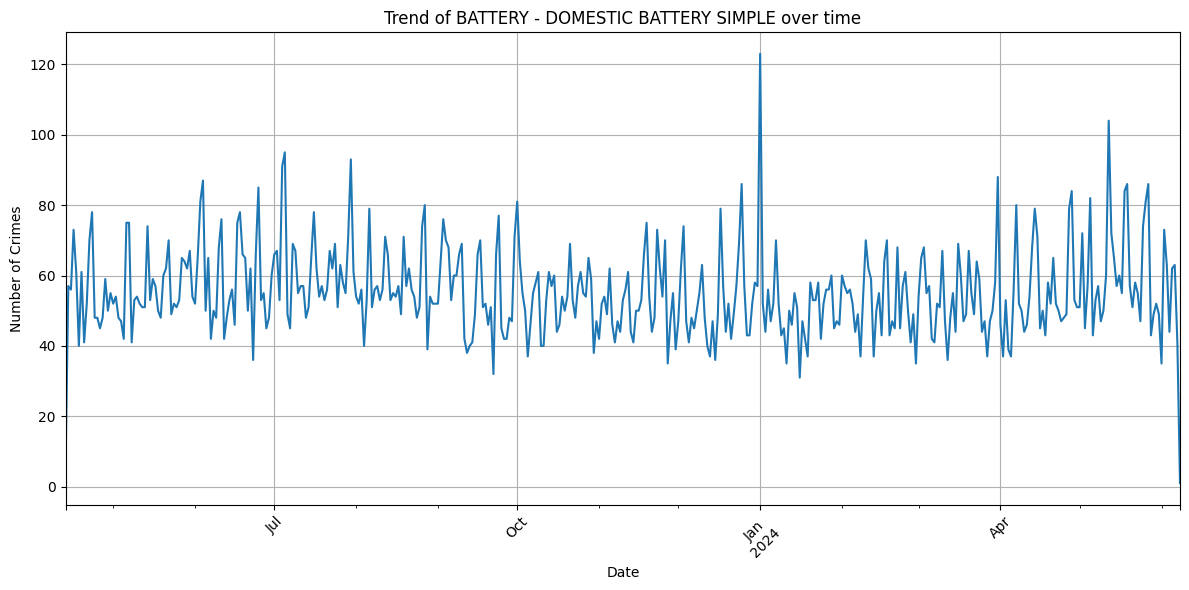

In [6]:
query = ''' Find the top crime committed, then plot a trend line by date.  '''
agent.chat(query=query)

2024-06-17 07:45:37 [INFO] Question: now, add an average trend line to the chart, in red. i should see the trend line and the data points on two lines
2024-06-17 07:45:37 [INFO] Running PandasAI with openai LLM...
2024-06-17 07:45:37 [INFO] Prompt ID: 7de10551-9b52-40c3-b799-cee008a5a25c
2024-06-17 07:45:37 [INFO] Executing Pipeline: GenerateChatPipeline
2024-06-17 07:45:37 [INFO] Executing Step 0: ValidatePipelineInput
2024-06-17 07:45:37 [INFO] Executing Step 1: CacheLookup
2024-06-17 07:45:37 [INFO] Using cached response
2024-06-17 07:45:37 [INFO] Executing Step 2: PromptGeneration
2024-06-17 07:45:37 [INFO] Executing Step 2: Skipping...
2024-06-17 07:45:37 [INFO] Executing Step 3: CodeGenerator
2024-06-17 07:45:37 [INFO] Executing Step 3: Skipping...
2024-06-17 07:45:37 [INFO] Executing Step 4: CachePopulation
2024-06-17 07:45:37 [INFO] Executing Step 4: Skipping...
2024-06-17 07:45:37 [INFO] Executing Step 5: CodeCleaning
2024-06-17 07:45:37 [INFO] Saving charts to /Users/eric/Lib

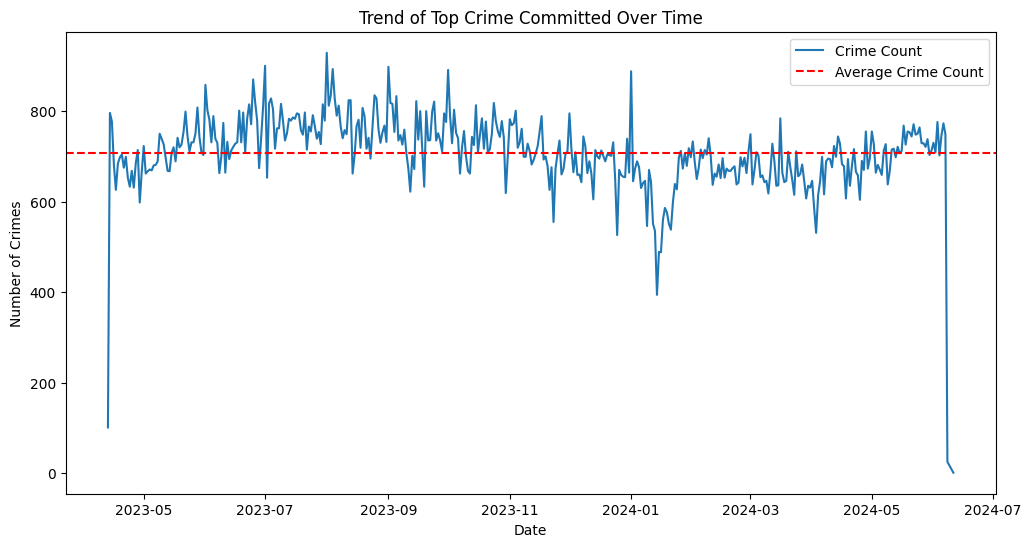

2024-06-17 07:45:38 [INFO] Executing Step 7: ResultValidation
2024-06-17 07:45:38 [INFO] Answer: {'type': 'plot', 'value': '/Users/eric/Library/CloudStorage/OneDrive-Personal/dev/pandasAi/exports/charts/temp_chart.png'}
2024-06-17 07:45:38 [INFO] Executing Step 8: ResultParsing


'/Users/eric/Library/CloudStorage/OneDrive-Personal/dev/pandasAi/exports/charts/temp_chart.png'

In [7]:
agent.chat(query="now, add an average trend line to the chart, in red. i should see the trend line and the data points on two lines")

In [8]:
print(agent.last_code_generated)

None


In [9]:
agent.explain()

2024-06-17 07:45:40 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-06-17 07:45:40 [INFO] Explanation:  I analyzed the data to count the number of crimes committed each day. Then, I created a line chart to show how this count changes over time. I also added a dashed red line to represent the average number of crimes committed. This way, you can easily see the trend of the top crime and compare it to the average.
                


'I analyzed the data to count the number of crimes committed each day. Then, I created a line chart to show how this count changes over time. I also added a dashed red line to represent the average number of crimes committed. This way, you can easily see the trend of the top crime and compare it to the average.'